In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re
import pyodbc

In [2]:
#1. In the above dataset,
#a. In case age is less than 18, replace it with mean of age values.

In [3]:
cust_acq = pd.read_csv('C://Users//sandisk//Downloads//DataScience using PYTHON//Case Studies//Python Foundation Case Study 2 - Credit Card Case Study//Case Study 2 - Credit Card Case Study//Customer Acqusition.csv//')

In [4]:
spend = pd.read_csv('C://Users//sandisk//Downloads//DataScience using PYTHON//Case Studies//Python Foundation Case Study 2 - Credit Card Case Study//Case Study 2 - Credit Card Case Study//spend.csv//')

In [5]:
repayment = pd.read_csv('C://Users//sandisk//Downloads//DataScience using PYTHON//Case Studies//Python Foundation Case Study 2 - Credit Card Case Study//Case Study 2 - Credit Card Case Study//Repayment.csv//')

In [6]:
(cust_acq['Age']<=18).sum()

6

In [7]:
age_mean = int(cust_acq['Age'].mean())

In [8]:
cust_acq.loc[cust_acq['Age'] <= 18, 'Age'] = age_mean

In [9]:
(cust_acq['Age']<=18).sum()

0

In [10]:
#b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. 
#(customer’s limit provided in acquisition table is the per transaction limit on his card)

In [11]:
cust_spend = pd.merge(cust_acq,spend,on='Customer',how = 'inner')

In [12]:
cust_spend['Amount'] = cust_spend['Amount'].where(cust_spend['Amount'] <= cust_spend['Limit'], cust_spend['Limit'] * 0.5)

In [13]:
(cust_spend['Amount']>cust_spend['Limit']).sum()

0

In [14]:
#c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [15]:
repayment.columns

Index(['SL No:', 'Customer', 'Month', 'Amount', 'Unnamed: 4'], dtype='object')

In [16]:
repayment.rename(columns={'Month':'Repay.Month', 'Amount':'Repay_Amount'},inplace = True)

In [17]:
merged_df = pd.merge(cust_spend,repayment, left_on=['Customer','Sl No:'], right_on = ['Customer','SL No:'])

In [18]:
merged_df.columns

Index(['No', 'Customer', 'Age', 'City', 'Product', 'Limit', 'Company',
       'Segment', 'Sl No:', 'Month', 'Type', 'Amount', 'SL No:', 'Repay.Month',
       'Repay_Amount', 'Unnamed: 4'],
      dtype='object')

In [19]:
merged_df.drop(columns = 'Unnamed: 4', inplace = True)

In [20]:
(merged_df['Repay_Amount']>merged_df['Limit']).sum()

600

In [21]:
merged_df['Repay_Amount'] = merged_df['Repay_Amount'].where(merged_df['Repay_Amount'] <= merged_df['Limit'],merged_df['Limit'])

In [22]:
(merged_df['Repay_Amount']>merged_df['Limit']).sum()

0

In [23]:
#2. From the above dataset create the following summaries:
#a. How many distinct customers exist?

In [24]:
merged_df['Customer'].nunique()

100

In [25]:
# b. How many distinct categories exist?

In [26]:
merged_df['Type'].nunique()

15

In [27]:
#c. What is the average monthly spend by customers?

In [28]:
spend['Month'] = pd.to_datetime(spend['Month'])

C:\Users\sandisk\AppData\Local\Temp\ipykernel_5920\1599234366.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  spend['Month'] = pd.to_datetime(spend['Month'])


In [29]:
spend['Month_Name'] = spend['Month'].dt.strftime('%B')

In [30]:
spend.groupby('Month_Name').agg({'Amount':np.mean}).reset_index()

,Month_Name,Amount
0,April,236671.847533
1,August,236056.328571
2,December,208987.020357
3,February,233037.216471
4,January,256221.133553
5,July,268042.287143
6,June,241329.181250
7,March,246255.783723
8,May,241277.023476
9,November,249099.824405


In [31]:
#d. What is the average monthly repayment by customers?

In [32]:
repayment.columns

Index(['SL No:', 'Customer', 'Repay.Month', 'Repay_Amount', 'Unnamed: 4'], dtype='object')

In [33]:
repayment['Repay.Month'] = pd.to_datetime(repayment['Repay.Month'] )

C:\Users\sandisk\AppData\Local\Temp\ipykernel_5920\112036771.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  repayment['Repay.Month'] = pd.to_datetime(repayment['Repay.Month'] )


In [34]:
repayment['Month_Name'] = repayment['Repay.Month'].dt.strftime('%B')

In [35]:
repayment.groupby('Month_Name').agg({'Repay_Amount':np.mean}).reset_index()

,Month_Name,Repay_Amount
0,April,259649.413200
1,August,254564.734898
2,December,286557.952500
3,February,248756.162368
4,January,245121.019624
5,July,253512.325102
6,June,220647.477083
7,March,241654.966393
8,May,257669.622782
9,November,229867.344524


In [36]:
#e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? 

In [37]:
Monthly_Spend =  spend.groupby('Month_Name').agg({'Amount':np.sum}).reset_index()

In [38]:
Monthly_repayment = repayment.groupby('Month_Name').agg({'Repay_Amount':np.sum}).reset_index()

In [39]:
Monthly_profit = pd.merge(Monthly_Spend, Monthly_repayment, on='Month_Name', how='inner')

Monthly_profit['Monthly_Profit'] = Monthly_profit['Repay_Amount'] - Monthly_profit['Amount']


In [40]:
Monthly_profit 

,Month_Name,Amount,Repay_Amount,Monthly_Profit
0,April,35500777.13,38947411.98,3446634.85
1,August,9914365.80,12473672.01,2559306.21
2,December,5851636.57,6877390.86,1025754.29
3,February,55462857.52,56716405.02,1253547.50
4,January,89421175.61,78193605.26,-11227570.35
5,July,11257776.06,12422103.93,1164327.87
6,June,13514434.15,10591078.90,-2923355.25
7,March,56885086.04,52922437.64,-3962648.40
8,May,50668174.93,68540119.66,17871944.73
9,November,20924385.25,19308856.94,-1615528.31


In [41]:
rate_of_int = 0.029

In [42]:
Monthly_profit.loc[Monthly_profit['Monthly_Profit'] < 0, 'Monthly_Profit'] = 0

In [43]:
Monthly_profit

,Month_Name,Amount,Repay_Amount,Monthly_Profit
0,April,35500777.13,38947411.98,3446634.85
1,August,9914365.80,12473672.01,2559306.21
2,December,5851636.57,6877390.86,1025754.29
3,February,55462857.52,56716405.02,1253547.50
4,January,89421175.61,78193605.26,0.00
5,July,11257776.06,12422103.93,1164327.87
6,June,13514434.15,10591078.90,0.00
7,March,56885086.04,52922437.64,0.00
8,May,50668174.93,68540119.66,17871944.73
9,November,20924385.25,19308856.94,0.00


In [44]:
Monthly_profit['Interest_Earned'] = Monthly_profit['Monthly_Profit'] * rate_of_int

Monthly_profit['Net_Profit'] = Monthly_profit['Monthly_Profit'] - Monthly_profit['Interest_Earned'].astype(int)


In [45]:
Monthly_profit

,Month_Name,Amount,Repay_Amount,Monthly_Profit,Interest_Earned,Net_Profit
0,April,35500777.13,38947411.98,3446634.85,99952.41065,3346682.85
1,August,9914365.80,12473672.01,2559306.21,74219.88009,2485087.21
2,December,5851636.57,6877390.86,1025754.29,29746.87441,996008.29
3,February,55462857.52,56716405.02,1253547.50,36352.87750,1217195.50
4,January,89421175.61,78193605.26,0.00,0.00000,0.00
5,July,11257776.06,12422103.93,1164327.87,33765.50823,1130562.87
6,June,13514434.15,10591078.90,0.00,0.00000,0.00
7,March,56885086.04,52922437.64,0.00,0.00000,0.00
8,May,50668174.93,68540119.66,17871944.73,518286.39717,17353658.73
9,November,20924385.25,19308856.94,0.00,0.00000,0.00


In [46]:
#f. What are the top 5 product types?

In [47]:
spend.columns

Index(['Sl No:', 'Customer', 'Month', 'Type', 'Amount', 'Month_Name'], dtype='object')

In [48]:
spend.groupby('Type').agg({'Amount':np.sum}).sort_values(by = 'Amount',ascending = False).head(5)

,Amount
Type,
PETRO,49863174.09
CAMERA,41481571.96
FOOD,37773338.43
TRAIN TICKET,33067077.15
AIR TICKET,32955445.42


In [49]:
# g. Which city is having maximum spend?

In [50]:
merged_df.columns

Index(['No', 'Customer', 'Age', 'City', 'Product', 'Limit', 'Company',
       'Segment', 'Sl No:', 'Month', 'Type', 'Amount', 'SL No:', 'Repay.Month',
       'Repay_Amount'],
      dtype='object')

In [51]:
merged_df.groupby('City').agg({'Amount':np.sum}).idxmax().max()

'COCHIN'

In [52]:
#h. Which age group is spending more money?

In [53]:
merged_df.groupby('Age').agg({'Amount':np.sum}).sort_values(by='Amount',ascending = False).head(1)

,Amount
Age,
46,20240746.17


In [54]:
#i. Who are the top 10 customers in terms of repayment?

In [55]:
repayment.columns

Index(['SL No:', 'Customer', 'Repay.Month', 'Repay_Amount', 'Unnamed: 4',
       'Month_Name'],
      dtype='object')

In [56]:
repayment.groupby('Customer').agg({'Repay_Amount':np.sum}).sort_values(by = 'Repay_Amount',ascending = False).head(10)

,Repay_Amount
Customer,
A61,10539142.91
A60,9876290.74
A13,9572000.66
A22,9372561.68
A21,9056336.15
A43,8489871.46
A45,8448334.87
A12,8334760.16
A48,8292416.75


In [57]:
#3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [58]:
merged_df['Month'] = pd.to_datetime(merged_df['Month'] )
merged_df['spend_year'] = merged_df['Month'].dt.year

C:\Users\sandisk\AppData\Local\Temp\ipykernel_5920\2522608491.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_df['Month'] = pd.to_datetime(merged_df['Month'] )


In [59]:
merged_df.columns

Index(['No', 'Customer', 'Age', 'City', 'Product', 'Limit', 'Company',
       'Segment', 'Sl No:', 'Month', 'Type', 'Amount', 'SL No:', 'Repay.Month',
       'Repay_Amount', 'spend_year'],
      dtype='object')

In [60]:
city_product_year_spend = merged_df.groupby(['City','Product','spend_year']).agg({'Amount':np.sum})

In [61]:
city_product_year_spend

Amount
City       Product  spend_year             
BANGALORE  Gold     2004         8804407.74
                    2005        12892362.99
                    2006        12030611.09
           Platimum 2004         1112732.30
                    2005          912284.97
...                                     ...
TRIVANDRUM Platimum 2005         3601443.30
                    2006         2147403.75
           Silver   2004          209667.48
                    2005          269912.99
                    2006          555862.12

[72 rows x 1 columns]

In [62]:
pivot_table = pd.pivot_table(city_product_year_spend, values='Amount', index=['City', 'Product'], columns=['spend_year'], aggfunc=np.sum, fill_value=0)

In [63]:
pivot_table

spend_year                 2004         2005         2006
City       Product                                       
BANGALORE  Gold      8804407.74  12892362.99  12030611.09
           Platimum  1112732.30    912284.97    685831.27
           Silver    1291852.58    830612.34   1415480.94
BOMBAY     Gold      6987853.53   8983018.28   7917144.31
           Platimum   897264.94    711804.94    972130.01
           Silver     532089.03    508988.54   1092833.80
CALCUTTA   Gold      7477140.98  10303355.80  11167532.77
           Platimum  2037690.30   4434696.31   3589606.66
           Silver     500006.00    440147.06   1157956.42
CHENNAI    Gold      1059618.50   3740945.58   2704288.62
           Platimum  3535652.38   5053956.32   5024923.40
           Silver     282056.86    377184.49    350009.50
COCHIN     Gold      7315850.15  12110613.03  10499142.38
           Platimum  3419904.07   4960921.71   4920592.29
           Silver     814229.62    652269.38   1269990.87
DELHI      Gold      2806495.00   1964845.27   2957103.32
           Platimum   283512.89    494157.86    176788.72
           Silver     768172.30    612311.21    854899.97
PATNA      Gold      2072567.90   3252615.77   2276181.69
           Platimum  1113069.60   2883231.07   1256137.65
           Silver     756684.10    950094.19    700005.00
TRIVANDRUM Gold      2415102.84   1240375.85   2735710.87
           Platimum  2161676.67   3601443.30   2147403.75
           Silver     209667.48    269912.99    555862.12

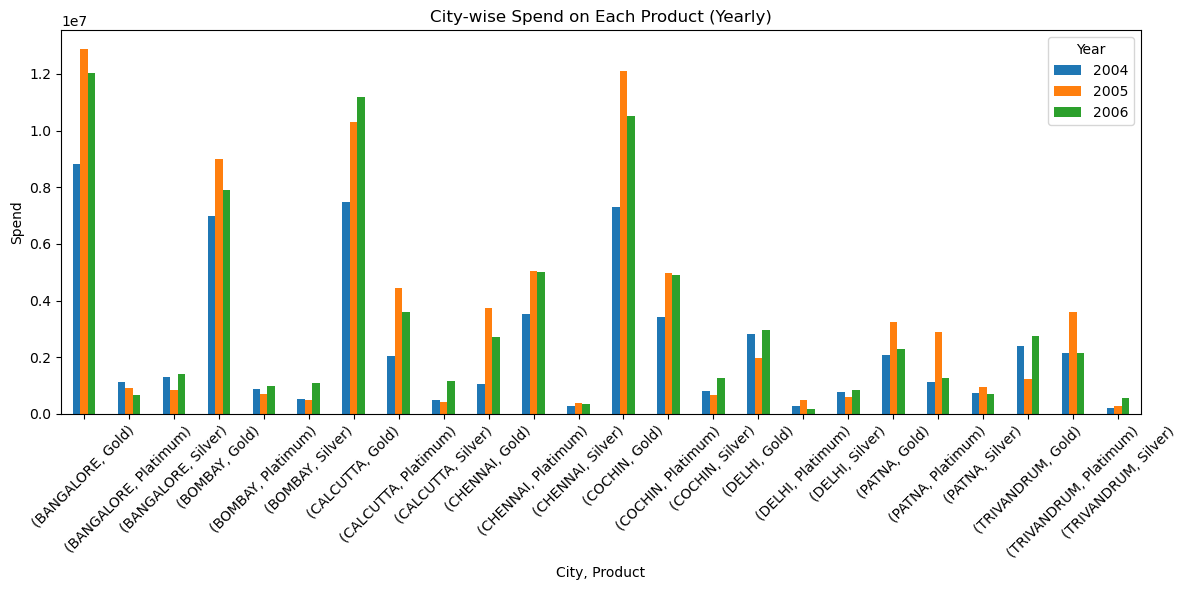

In [64]:
pivot_table.plot(kind='bar', figsize=(12, 6))
plt.title('City-wise Spend on Each Product (Yearly)')
plt.xlabel('City, Product')
plt.ylabel('Spend')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.tight_layout()
plt.show()

In [65]:
#4. Create graphs for
#a. Monthly comparison of total spends, city wise

In [66]:
merged_df['spend_month'] = merged_df['Month'].dt.strftime('%B')

In [67]:
merged_df.columns

Index(['No', 'Customer', 'Age', 'City', 'Product', 'Limit', 'Company',
       'Segment', 'Sl No:', 'Month', 'Type', 'Amount', 'SL No:', 'Repay.Month',
       'Repay_Amount', 'spend_year', 'spend_month'],
      dtype='object')

In [68]:
city_month_spends = merged_df.groupby(['City','spend_month']).agg({'Amount':np.sum})

In [69]:
pivot = city_month_spends.pivot_table(values = 'Amount', index = 'spend_month', columns = 'City')

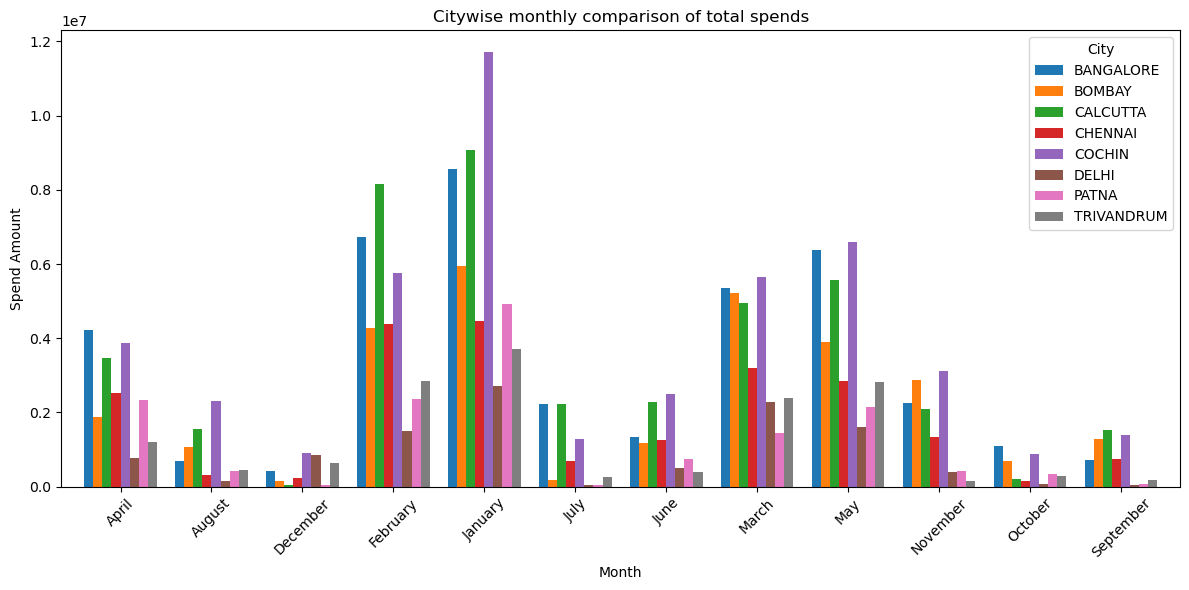

In [70]:
pivot.plot(kind = 'bar', figsize = (12,6), width = 0.8)
plt.title('Citywise monthly comparison of total spends')
plt.legend(title = 'City')
plt.ylabel('Spend Amount')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [71]:
#b. Comparison of yearly spend on air tickets

In [72]:
air_ticket = merged_df[merged_df['Type'] == 'AIR TICKET']
yearly_spend_airticket = air_ticket.groupby(['Type','spend_year']).agg({'Amount':np.sum})

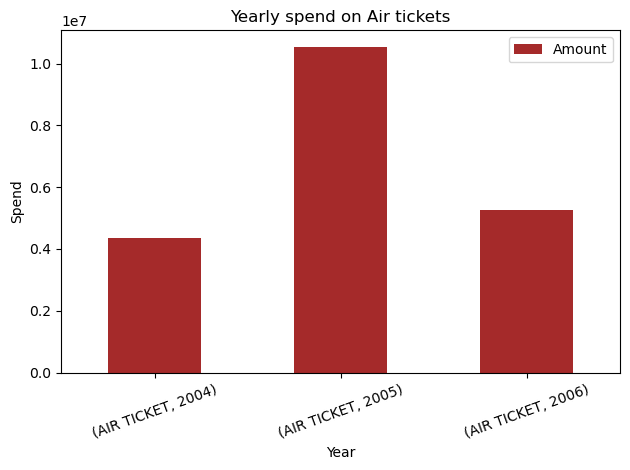

In [73]:
yearly_spend_airticket.plot(kind = 'bar', color = ['brown']) 
plt.title('Yearly spend on Air tickets')
plt.ylabel('Spend')
plt.xlabel('Year')
plt.xticks(rotation = 20)
plt.tight_layout()
plt.show()


In [74]:
# c. Comparison of monthly spend for each product (look for any seasonalitythat exists in terms of spend)

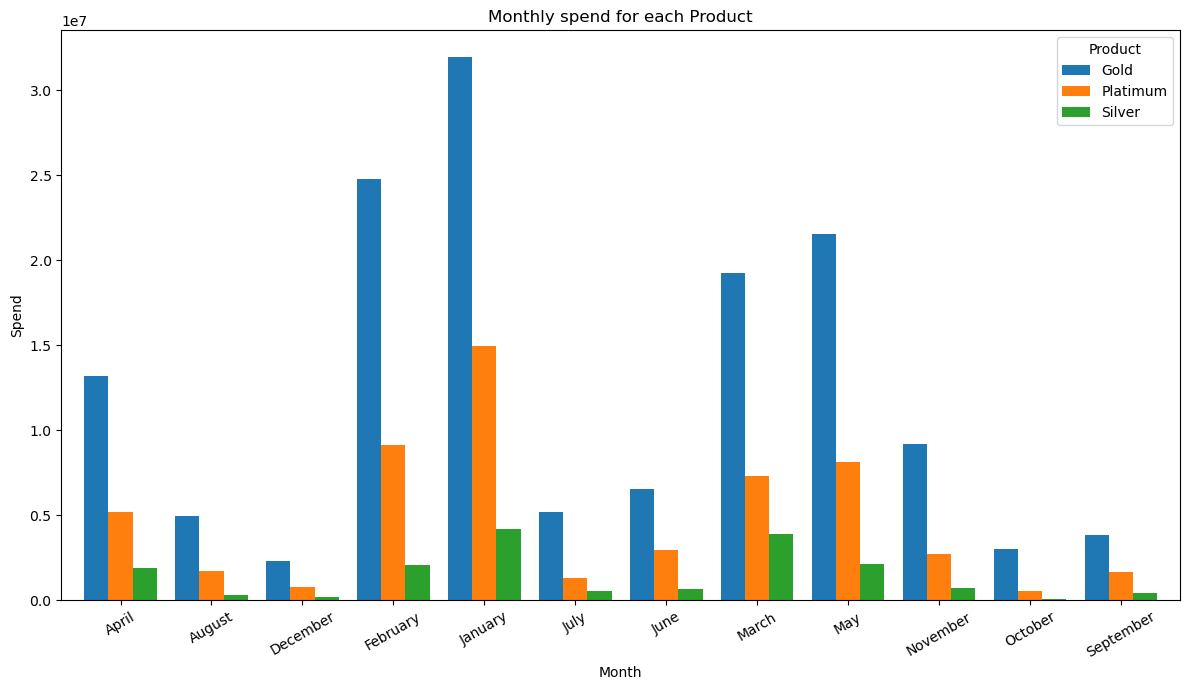

In [75]:
mon_prod = (merged_df.groupby(['Product','spend_month']).agg({'Amount':np.sum}))
(pd.pivot_table(mon_prod, values = 'Amount',columns = 'Product', index = 'spend_month')).plot(kind = 'bar',width = 0.8, figsize = (12,7))
plt.xticks(rotation = 30)
plt.ylabel('Spend')
plt.xlabel('Month')
plt.title('Monthly spend for each Product')
plt.tight_layout()
plt.show()

In [76]:
#5. Write user defined PYTHON function to perform the following analysis:

#You need to find top 10 customers for each cityin terms of their repayment amount by different products and by different 
#time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and 
#time period (yearly or monthly) and the function should automatically take these inputs while identifying the 
#top 10 customers.

In [82]:
merged_df['Repay.Month'] = pd.to_datetime(merged_df['Repay.Month'])

In [78]:
merged_df['repay_mon_name'] = merged_df['Repay.Month'].dt.strftime('%B')
merged_df['repay_year'] = merged_df['Repay.Month'].dt.year

In [81]:
merged_df.columns

Index(['No', 'Customer', 'Age', 'City', 'Product', 'Limit', 'Company',
       'Segment', 'Sl No:', 'Month', 'Type', 'Amount', 'SL No:', 'Repay.Month',
       'Repay_Amount', 'spend_year', 'spend_month', 'repay_mon_name',
       'repay_year'],
      dtype='object')

In [103]:
def topcust_by_city(merged_df,product,time_period):
    
#Filter data for product    
    merged_df = merged_df[merged_df['Product']==product]
    
#Yearly and Monthly based on time period    
    if time_period == 'yearly':
        time_col = 'repay_year'
    elif time_period == 'monthly':
        time_col = 'repay_mon_name'
        
#Group by city, customer and time_period
    grouped = merged_df.groupby(['City', 'Customer', time_col])['Repay_Amount'].sum().reset_index()
    
#Get top 10 customers
    
    top_10 = grouped.groupby(['City',time_col]).apply(lambda x: x.nlargest(10, 'Repay_Amount')).reset_index(drop=True)
        
    return top_10

product_input = input("Enter product (Gold/Silver/Platinum): ")
time_period_input = input("Enter time period (yearly or monthly): ")

topcust_by_city(merged_df,time_period = time_period_input , product = product_input) 

Enter product (Gold/Silver/Platinum): Silver
Enter time period (yearly or monthly): yearly


,City,Customer,repay_year,Repay_Amount
0,BANGALORE,A59,2004,676557.50
1,BANGALORE,A23,2004,664965.71
2,BANGALORE,A18,2004,491592.71
3,BANGALORE,A72,2004,100000.00
4,BANGALORE,A23,2005,1000010.00
5,BANGALORE,A18,2005,638296.41
6,BANGALORE,A59,2005,427247.08
7,BANGALORE,A76,2005,265619.05
8,BANGALORE,A23,2006,872925.32
9,BANGALORE,A18,2006,700000.00


In [102]:
topcust_by_city(merged_df,time_period = time_period_input , product = product_input) 

,City,Customer,repay_mon_name,Repay_Amount
0,BANGALORE,A14,April,812582.20
1,BANGALORE,A43,April,612541.80
2,BANGALORE,A1,April,508949.16
3,BANGALORE,A13,April,494392.40
4,BANGALORE,A92,April,459105.69
...,...,...,...,...
206,TRIVANDRUM,A28,February,968709.79
207,TRIVANDRUM,A28,January,1034461.46
208,TRIVANDRUM,A28,July,380460.40
209,TRIVANDRUM,A28,March,1547067.86
